In [66]:
import pandas as pd
import numpy as np

df_embedding = pd.read_csv("data/embedding/bulletin_data_with_summary_embeddings.csv")
df_main = pd.read_csv("outputs/summary_kmeans/data_with_clusters.csv")
df_sub = pd.read_csv("outputs/subtopics/data_with_subtopics.csv")

In [51]:
print(len(df_embedding))
df_embedding.head(2)

6944


,연번,상담일자,상담유형,상담요약,상담인 유형,상담내용,연도,embedding,summary_embedding
0,1,2023.1.2-6,전화,누수피해,구분소유자,배수관 역류에 따라 바닥재(마루) 및 씽크대 등의 피해가 발생하였습니다. 역류원인을...,2023,"[0.015961677, 0.03234928, 0.07411159, 0.007246...","[0.02874046191573143, -0.016275031492114067, 0..."
1,2,2023.1.2-6,전화,통합정보마당,임차인,통합정보마당 사용 방법에 대한 이해,2023,"[-0.019310059, 0.0036593825, 0.005384315, -0.0...","[-0.022464005276560783, 0.0037450117524713278,..."


In [52]:
print(len(df_main))
df_main.head(2)

6942


,연번,상담일자,상담유형,상담요약,상담인 유형,상담내용,연도,embedding,summary_embedding,cluster
0,1,2023.1.2-6,전화,누수피해,구분소유자,배수관 역류에 따라 바닥재(마루) 및 씽크대 등의 피해가 발생하였습니다. 역류원인을...,2023,"[0.015961677, 0.03234928, 0.07411159, 0.007246...","[0.02874046191573143, -0.016275031492114067, 0...",7
1,2,2023.1.2-6,전화,통합정보마당,임차인,통합정보마당 사용 방법에 대한 이해,2023,"[-0.019310059, 0.0036593825, 0.005384315, -0.0...","[-0.022464005276560783, 0.0037450117524713278,...",8


In [53]:
print(len(df_sub))
df_sub.head(2)

6942


,연번,상담일자,상담유형,상담요약,상담인 유형,상담내용,연도,embedding,summary_embedding,major_topic,subtopic,topic
0,1,2023.1.2-6,전화,누수피해,구분소유자,배수관 역류에 따라 바닥재(마루) 및 씽크대 등의 피해가 발생하였습니다. 역류원인을...,2023,"[0.015961677, 0.03234928, 0.07411159, 0.007246...","[0.02874046191573143, -0.016275031492114067, 0...",7,0,7_0
1,2,2023.1.2-6,전화,통합정보마당,임차인,통합정보마당 사용 방법에 대한 이해,2023,"[-0.019310059, 0.0036593825, 0.005384315, -0.0...","[-0.022464005276560783, 0.0037450117524713278,...",8,3,8_3


In [74]:
unique = np.sort(df_main['cluster'].unique())
print("대주제 종류:", unique)
print("대주제 갯수:", len(unique))
print("")
print("-"*50)
print("전체 상담 중 대주제 분포:")
for topic in unique:
    print("-"*50)
    print(f"대주제 {topic}: {len(df_main[df_main['cluster'] == topic])}")

print("-"*50)

대주제 종류: [0 1 2 3 4 5 6 7 8]
대주제 갯수: 9

--------------------------------------------------
전체 상담 중 대주제 분포:
--------------------------------------------------
대주제 0: 217
--------------------------------------------------
대주제 1: 451
--------------------------------------------------
대주제 2: 492
--------------------------------------------------
대주제 3: 668
--------------------------------------------------
대주제 4: 176
--------------------------------------------------
대주제 5: 2316
--------------------------------------------------
대주제 6: 454
--------------------------------------------------
대주제 7: 236
--------------------------------------------------
대주제 8: 1932
--------------------------------------------------


In [78]:
print("각 대주제별 소주제 분포:")
for topic in unique:
    print("-"*50)
    print(f"대주제 {topic}의 소주제 종류: {np.sort(df_sub[df_sub['major_topic'] == topic]['subtopic'].unique())}")
    print(f"대주제 {topic} 갯수: {len(df_sub[df_sub['major_topic'] == topic])}")
print("-"*50)

각 대주제별 소주제 분포:
--------------------------------------------------
대주제 0의 소주제 종류: [0 1 2]
대주제 0 갯수: 217
--------------------------------------------------
대주제 1의 소주제 종류: [ 0  1  2  3  4  5  6  7  8  9 10]
대주제 1 갯수: 451
--------------------------------------------------
대주제 2의 소주제 종류: [0 1]
대주제 2 갯수: 492
--------------------------------------------------
대주제 3의 소주제 종류: [0 1 2 3 4 5 6 7]
대주제 3 갯수: 668
--------------------------------------------------
대주제 4의 소주제 종류: [0 1 2]
대주제 4 갯수: 176
--------------------------------------------------
대주제 5의 소주제 종류: [0 1 2 3]
대주제 5 갯수: 2316
--------------------------------------------------
대주제 6의 소주제 종류: [0 1 2]
대주제 6 갯수: 454
--------------------------------------------------
대주제 7의 소주제 종류: [0 1]
대주제 7 갯수: 236
--------------------------------------------------
대주제 8의 소주제 종류: [0 1 2 3 4 5 6 7 8]
대주제 8 갯수: 1932
--------------------------------------------------


In [81]:
topics = df_sub['topic'].unique()

sorted_topics = sorted(
    topics, 
    key=lambda x: (int(x.split('_')[0]), int(x.split('_')[1]))
)

정렬된 주제 종류: ['0_0', '0_1', '0_2', '1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '2_0', '2_1', '3_0', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '4_0', '4_1', '4_2', '5_0', '5_1', '5_2', '5_3', '6_0', '6_1', '6_2', '7_0', '7_1', '8_0', '8_1', '8_2', '8_3', '8_4', '8_5', '8_6', '8_7', '8_8']


In [82]:
print("주제 종류:", sorted_topics)
print("주제 갯수:", len(sorted_topics))

주제 종류: ['0_0', '0_1', '0_2', '1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '2_0', '2_1', '3_0', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '4_0', '4_1', '4_2', '5_0', '5_1', '5_2', '5_3', '6_0', '6_1', '6_2', '7_0', '7_1', '8_0', '8_1', '8_2', '8_3', '8_4', '8_5', '8_6', '8_7', '8_8']
주제 갯수: 45


In [87]:
print("주제별 상담 갯수:")
for topics in sorted_topics:
    print(f"{topics} 상담 갯수:", len(df_sub[df_sub['topic'] == topics]))

주제별 상담 갯수:
0_0 상담 갯수: 81
0_1 상담 갯수: 57
0_2 상담 갯수: 79
1_0 상담 갯수: 11
1_1 상담 갯수: 64
1_2 상담 갯수: 87
1_3 상담 갯수: 48
1_4 상담 갯수: 53
1_5 상담 갯수: 49
1_6 상담 갯수: 23
1_7 상담 갯수: 25
1_8 상담 갯수: 36
1_9 상담 갯수: 24
1_10 상담 갯수: 31
2_0 상담 갯수: 340
2_1 상담 갯수: 152
3_0 상담 갯수: 93
3_1 상담 갯수: 74
3_2 상담 갯수: 93
3_3 상담 갯수: 73
3_4 상담 갯수: 67
3_5 상담 갯수: 93
3_6 상담 갯수: 95
3_7 상담 갯수: 80
4_0 상담 갯수: 50
4_1 상담 갯수: 76
4_2 상담 갯수: 50
5_0 상담 갯수: 161
5_1 상담 갯수: 908
5_2 상담 갯수: 670
5_3 상담 갯수: 577
6_0 상담 갯수: 88
6_1 상담 갯수: 143
6_2 상담 갯수: 223
7_0 상담 갯수: 134
7_1 상담 갯수: 102
8_0 상담 갯수: 126
8_1 상담 갯수: 103
8_2 상담 갯수: 78
8_3 상담 갯수: 374
8_4 상담 갯수: 157
8_5 상담 갯수: 323
8_6 상담 갯수: 160
8_7 상담 갯수: 275
8_8 상담 갯수: 336


/var/folders/r2/hf806xw17vv9p1hn3v10qr980000gn/T/ipykernel_35052/2719511367.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topic_df, x="Topic", y="Consultation Count", palette="viridis")


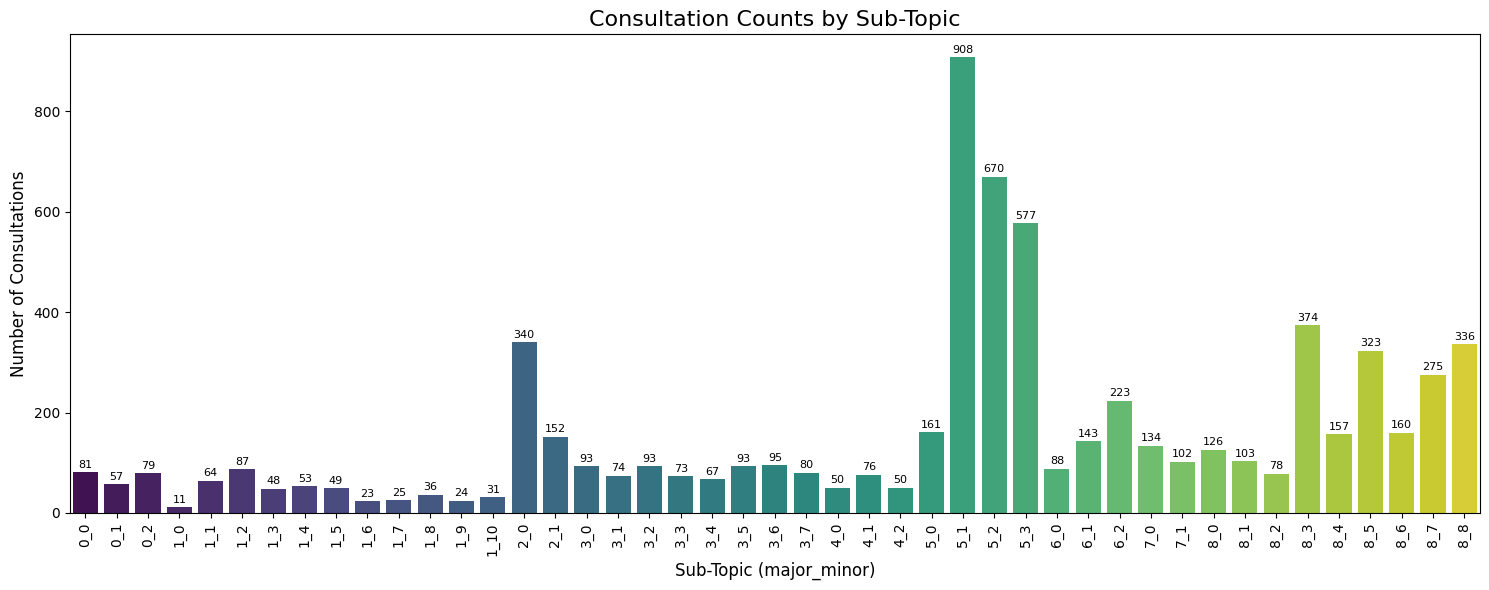

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주제별 상담 갯수 집계
topic_counts = {topic: len(df_sub[df_sub['topic'] == topic]) for topic in sorted_topics}
topic_df = pd.DataFrame(list(topic_counts.items()), columns=["Topic", "Consultation Count"])

# 시각화
plt.figure(figsize=(15, 6))
sns.barplot(data=topic_df, x="Topic", y="Consultation Count", palette="viridis")

plt.xticks(rotation=90)
plt.title("Consultation Counts by Sub-Topic", fontsize=16)
plt.xlabel("Sub-Topic (major_minor)", fontsize=12)
plt.ylabel("Number of Consultations", fontsize=12)

# 값 라벨 추가
for i, row in topic_df.iterrows():
    plt.text(i, row["Consultation Count"] + 5, str(row["Consultation Count"]), 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [91]:
topic_0 = pd.read_csv("outputs/subtopics/major_topic_0_subtopics.csv")
topic_1 = pd.read_csv("outputs/subtopics/major_topic_1_subtopics.csv")
topic_2 = pd.read_csv("outputs/subtopics/major_topic_2_subtopics.csv")
topic_3 = pd.read_csv("outputs/subtopics/major_topic_3_subtopics.csv")
topic_4 = pd.read_csv("outputs/subtopics/major_topic_4_subtopics.csv")
topic_5 = pd.read_csv("outputs/subtopics/major_topic_5_subtopics.csv")
topic_6 = pd.read_csv("outputs/subtopics/major_topic_6_subtopics.csv")
topic_7 = pd.read_csv("outputs/subtopics/major_topic_7_subtopics.csv")
topic_8 = pd.read_csv("outputs/subtopics/major_topic_8_subtopics.csv")

In [93]:
topic_0.head(2)

,연번,상담일자,상담유형,상담요약,상담인 유형,상담내용,연도,embedding,summary_embedding,major_topic,subtopic,topic
0,22,2023.1.2-6,전화,기타,구분소유자,집합건물 담당자 이메일을 알려달라고 함.,2023,"[0.018483004, 0.009882499, 0.005412243, -0.002...","[-0.014973391778767109, -0.014451360329985619,...",0,2,0_2
1,62,2023.1.19-13,전화,기타,임차인,1개의 점포를 임대인이 마음대로 분할해서 여러 사람들한테 임차를 하는 것이 불법이 ...,2023,"[0.029394068, 0.023809971, 0.026860543, 0.0394...","[-0.014973391778767109, -0.014451360329985619,...",0,0,0_0
